# Corotation

Corotation is the rotation in conjunction with another body. In our case, it is the rotation of the stars with the arms of the Milky Way galaxy.

## Let's start

First of all, we have to tell the Jupiter Notebook to render our graphs. In order to do that, we use one of what is known as _magic functions_

From the docs:

`%matplotlib inline` sets the backend of matplotlib to the 'inline' backend.

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

So, here we go:

In [ ]:
%matplotlib inline

The next step is to import the libraries we are going to use. Here is a list with an explanation:

### numpy

NumPy is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

### matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

From it, we imported:
   
  * pyplot: matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation

  * animation: The easiest way to make a live animation in matplotlib is to use one of the Animation classes.

### scipy

SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

From it, we imported:

  * misc: it contains various utilities that don’t have another home inside scipy.
  * ndimage: this package contains various functions for multi-dimensional image processing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.misc import imread

import scipy.misc
from scipy import ndimage

## The Code

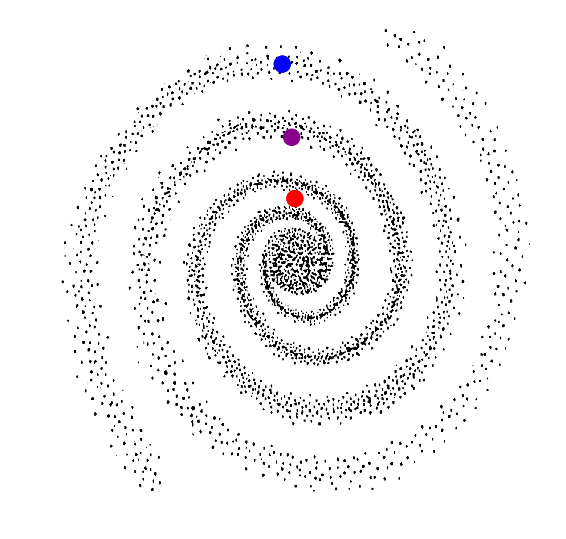

In [29]:
# Import the background image - the galaxy and its arms.
img = imread('galaxy-white.png')

# Create a figure that will hold the images and configure its inches and dpis.
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

# Set the x and y axes with 20 points each
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))

# We are going to draw three circles. Each one will move with a different speed to 
# show how they move in comparison with the arms of the galaxy.
#
# The params of the Circle are xy (initial position), radius and extra arguments 
# (we used it to change the color).
first_star = plt.Circle((5, -5), 0.35, fc='blue')
second_star = plt.Circle((5, -5), 0.35, fc='red')
third_star = plt.Circle((5, -5), 0.35, fc='darkmagenta')

# The init method will be called at the begining of the animation. It sets the 
# initial position of the stars.
def init():
    first_star.center=(20, 20)
    second_star.center=(20, 20)
    third_star.center=(10, 15)

    ax.add_patch(first_star)
    ax.add_patch(second_star)
    ax.add_patch(third_star)

    return first_star, second_star, third_star,

# Each step of the animation calls the `animate` method. It changes the position 
# of the stars one bit at a time, and also rotates the galaxy in the background.
#
# The `sin` and `cos` functions are used to force the circular rotation of the stars.
def animate(i):
    # The first star (the blue one) will be the "outer star". It will be 8 pixels 
    # further the (10, 10) center and will move faster.
    x = 10 + 8 * np.sin(np.radians(2*i))
    y = 10 + 8 * np.cos(np.radians(2*i))
    first_star.center = (x, y)

    # The second star (the red one) will be the closest to the center of the galaxy. It 
    # will be 2.5 pixels further the (10, 10) center and will move slower than the 
    # others.
    x = 10 + 2.5 * np.sin(np.radians(0.5*i))
    y = 10 + 2.5 * np.cos(np.radians(0.5*i))
    second_star.center=(x, y)

    # The third star (the dark magenta one) will be the "middle star". It will be 
    # 5 pixels further the (10, 10) center.
    x = 10 + 5 * np.sin(np.radians(i))
    y = 10 + 5 * np.cos(np.radians(i))
    third_star.center=(x, y)

    # Finally, let's rotate the galaxy a little bit. We are using the ndimage
    # to do it. One important parameter is the `reshape=False`, because, without it,
    # the image is resized to fit the area in which it is contained, distorting our
    # animation.
    rotated_img = ndimage.rotate(img, -i, reshape=False)
    plt.imshow(rotated_img, zorder=0, extent=[0.1, 20.0, 0.1, 20.0])
    
    
    return first_star, second_star, third_star

# Now, let's simply call the animation passing the necessary parameters.
# Get the popcorn and watch the masterpiece.
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=10, 
                               interval=20,
                               blit=True)

# For the purpose of this demonstration we don't need the x and y axis, so we disable them.
plt.axis('off')

# At the end, we save the result in a video, that will be saved in the same folder
# of this notebook.
anim.save('corotation-video.mp4', writer='ffmpeg', fps=30)
plt.show()